           0         1
0   0.955845  0.806230
1   0.011490  0.408691
2   0.826045  0.750929
3   0.813038  0.675849
4   0.192514  0.910614
..       ...       ...
95  2.855774  2.289167
96  2.590201  2.084632
97  2.303034  2.623621
98  2.380914  2.916585
99  2.605082  2.773149

[100 rows x 2 columns]


<AxesSubplot: xlabel='0', ylabel='1'>

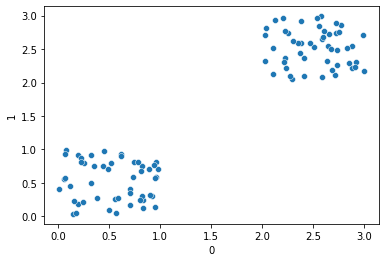

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Seaborn es una biblioteca que utiliza Matplotlib para digujar gráficos. Se utilizará para visualizar distribuciones aleatorias
import seaborn as sns

#generamos 100 puntos aleatorios
X= np.random.rand(50,2)
Y= 2 + np.random.rand(50,2)
Z= np.concatenate((X,Y))
Z=pd.DataFrame(Z) #se convierten a un data frame

#calculamos el valor de Silhouette
print(Z)
sns.scatterplot(x=Z[0],y=Z[1])


Silhouette Score(n=2): 0.8130512717947327


<AxesSubplot: xlabel='0', ylabel='1'>

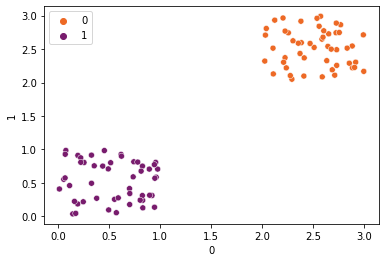

In [4]:
#ejecutamos KMeans con dos clusters
kmeans= KMeans(n_clusters=2)
kmeans.fit(Z)
label=kmeans.predict(Z)

#df = pd.concat([Z[0],Z[1]],axis=1).reset_index()
#df["label"] = label
#df.columns =["index","d1","d2","label"]
#print(df)

#calculamos el valor de Silhouette
print(f'Silhouette Score(n=2): {silhouette_score(Z, label)}')
sns.scatterplot(x=Z[0],y=Z[1],hue=label,palette='inferno_r')
#sns.scatterplot(df,x='d1',y='d2',hue='label',palette='inferno_r')


    index        d1        d2  label
0       0  0.955845  0.806230      2
1       1  0.011490  0.408691      1
2       2  0.826045  0.750929      2
3       3  0.813038  0.675849      2
4       4  0.192514  0.910614      1
..    ...       ...       ...    ...
95     95  2.855774  2.289167      0
96     96  2.590201  2.084632      0
97     97  2.303034  2.623621      0
98     98  2.380914  2.916585      0
99     99  2.605082  2.773149      0

[100 rows x 4 columns]
Silhouette Score(n=3): 0.6051952181742967


<AxesSubplot: xlabel='d1', ylabel='d2'>

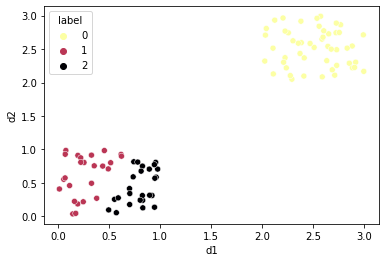

In [6]:
kmeans= KMeans(n_clusters=3)
kmeans.fit(Z)
label=kmeans.predict(Z)

df = pd.concat([Z[0],Z[1]],axis=1).reset_index()
df["label"] = label
df.columns =["index","d1","d2","label"]
print(df)
print(f'Silhouette Score(n=3): {silhouette_score(Z, label)}')
sns.scatterplot(df,x='d1',y='d2',hue='label',palette='inferno_r')


In [7]:
from sklearn import datasets
from sklearn.cluster import KMeans
#
# Load IRIS dataset
#
iris = datasets.load_iris()
X = iris.data
y = iris.target
#
# Instantiate the KMeans models
#
km = KMeans(n_clusters=3, random_state=42)
#
# Fit the KMeans model
#
km.fit_predict(X)
#
# Calculate Silhoutte Score
#
score = silhouette_score(X, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.553


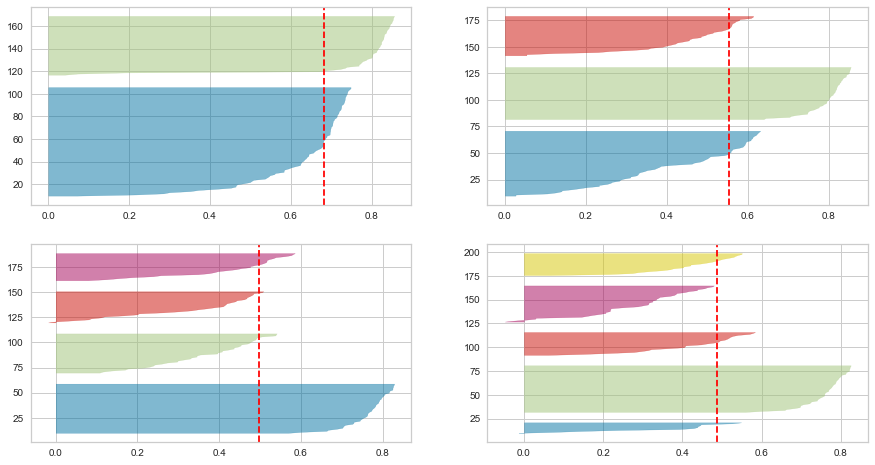

In [8]:
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    km.fit_predict(X)
    q, mod = divmod(i, 2)
    
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

    index        d1        d2  label
0       0  0.955845  0.806230      2
1       1  0.011490  0.408691      0
2       2  0.826045  0.750929      2
3       3  0.813038  0.675849      2
4       4  0.192514  0.910614      0
..    ...       ...       ...    ...
95     95  2.855774  2.289167      3
96     96  2.590201  2.084632      3
97     97  2.303034  2.623621      1
98     98  2.380914  2.916585      1
99     99  2.605082  2.773149      1

[100 rows x 4 columns]
Silhouette Score(n=4): 0.36734489801110776


<AxesSubplot: xlabel='d1', ylabel='d2'>

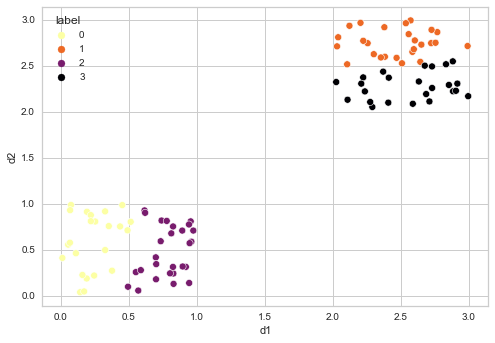

In [9]:
kmeans= KMeans(n_clusters=4)
kmeans.fit(Z)
label=kmeans.predict(Z)

df = pd.concat([Z[0],Z[1]],axis=1).reset_index()
df["label"] = label
df.columns =["index","d1","d2","label"]
print(df)
print(f'Silhouette Score(n=4): {silhouette_score(Z, label)}')
sns.scatterplot(df,x='d1',y='d2',hue='label',palette='inferno_r')